# Task 3: Customer Segmentation / Clustering
Performing customer segmentation using clustering techniques. Use both profile information (from Customers.csv) and transaction information (from Transactions.csv).

To perform customer segmentation using clustering techniques based on both profile information from Customers.csv and transaction information from Transactions.csv, we can follow a structured approach. Below is a detailed outline of how to implement this, including code snippets, clustering metrics, and visualizations.

* Step 1: Data Preparation
    * Load the Data: Read both Customers.csv and Transactions.csv.
    * Data Cleaning: Handle missing values and ensure data types are correct.
    * ature Engineering: Create features that represent customer profiles and transaction history.

* Step 2: Feature Selection
    * Profile Features: Use demographic information (age, gender, location, etc.).
    * Transaction Features: Use transaction frequency, average transaction value, and total spending.

* Step 3: Clustering
    * Choose a Clustering Algorithm: We can use K-Means, DBSCAN, or Hierarchical Clustering.
    * Determine the Number of Clusters: Use methods like the Elbow Method or Silhouette Score to determine the optimal number of clusters.
    * Calculate Clustering Metrics: Calculate the Davies-Bouldin Index and other relevant metrics.

* Step 4: Visualization
    * Visualize Clusters: Use PCA or t-SNE for dimensionality reduction and visualize the clusters.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA

In [2]:
# Step 1: Load the Data
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')

# Step 2: Data Cleaning
customers.dropna(inplace=True)
transactions.dropna(inplace=True)

In [6]:
transactions.head()
customers.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [8]:
# Step 3: Feature Engineering
# Aggregate transaction data
transaction_summary = transactions.groupby('CustomerID').agg({
    'TotalValue': ['count', 'mean', 'sum']
}).reset_index()
transaction_summary.columns = ['CustomerID', 'TransactionCount', 'AverageTransaction', 'TotalSpent']

# Merge customer profile with transaction summary
customer_data = pd.merge(customers, transaction_summary, on='CustomerID', how='left')

# Fill missing values in transaction features
customer_data.fillna(0, inplace=True)

# Select relevant features for clustering
features = customer_data[['CustomerName', 'SignupDate', 'Region', 'TransactionCount', 'AverageTransaction', 'TotalSpent']]
features = pd.get_dummies(features)  # Convert categorical variables to dummy variables

# Normalize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [9]:
# Step 4: Clustering
# Determine the optimal number of clusters using the Elbow Method
inertia = []
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(features_scaled, kmeans.labels_))

c:\Users\ranja\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ranja\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ranja\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ranja\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

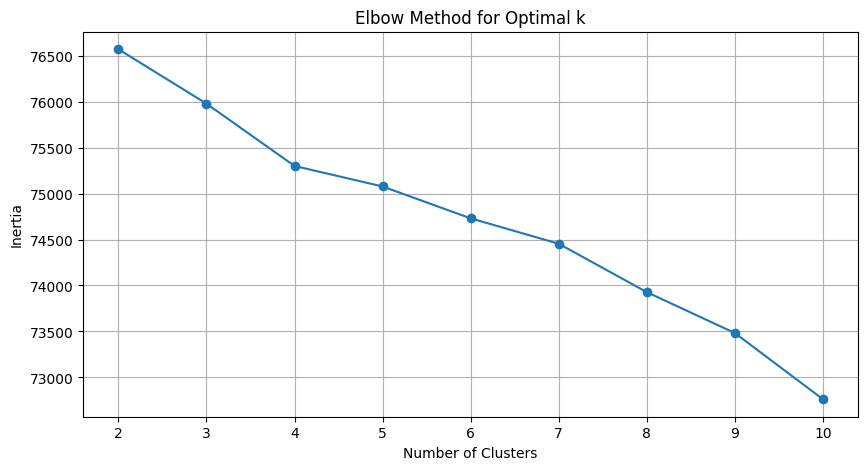

In [10]:
# Plot Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()

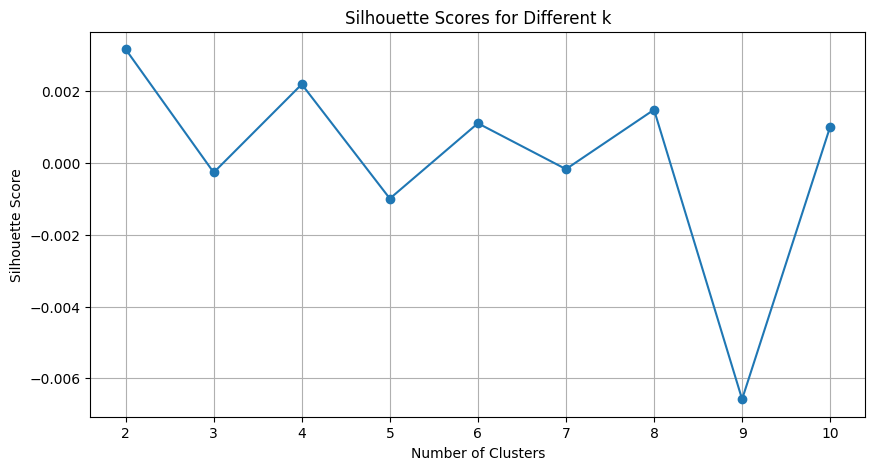

In [11]:
# Plot Silhouette Scores
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different k')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()

In [12]:
# Choose the optimal number of clusters (e.g., 4 based on the plots)
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(features_scaled)

# Calculate clustering metrics
db_index = davies_bouldin_score(features_scaled, customer_data['Cluster'])
silhouette_avg = silhouette_score(features_scaled, customer_data['Cluster'])

c:\Users\ranja\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


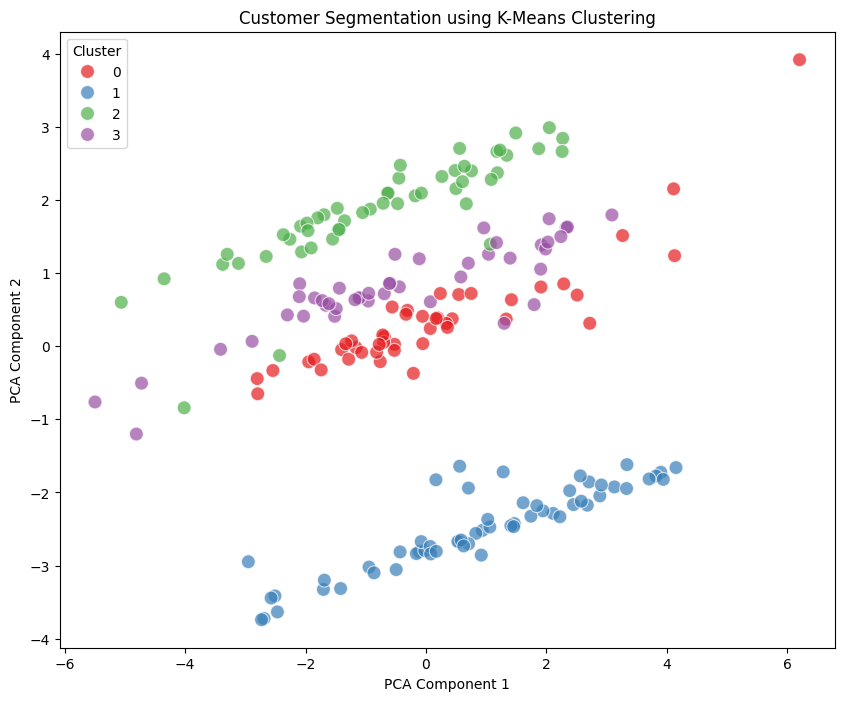

In [13]:
# Step 5: Visualization
# PCA for visualization
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)
customer_data['PCA1'] = features_pca[:, 0]
customer_data['PCA2'] = features_pca[:, 1]

plt.figure(figsize=(10, 8))
sns.scatterplot(data=customer_data, x='PCA1', y='PCA2', hue='Cluster', palette='Set1', s=100, alpha=0.7)
plt.title('Customer Segmentation using K-Means Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()